In [1]:
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Resize, ToTensor, Normalize, CenterCrop, Grayscale
import matplotlib.pyplot as plt
import time
import dataset as data
import model as md
import numpy as np

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using {} device".format(DEVICE))

Using cpu device


In [2]:
## Hyperparameters
Batch_size = 32
Optimizer_type = 'ADAM'
Learning_rate = 1e-5
Weight_decay = 0
epochs = 15

In [3]:
def Sample_visualize(dataloader) :
  ## Visualize some preprocess images
  ##
  ## Input : dataloader of image dataset
  ## Output : image plots

 dataiter = iter(dataloader)
 images, labels = next(dataiter)
 images = images.numpy()
 for i in range (2) :
   plt.subplot(1,4,i+1)
   plt.imshow(images[i].reshape(64,192), cmap='gray')
   plt.xticks([])
   plt.yticks([])

   print(labels)

In [4]:
train_dataset = data.LicensePlateDataset(directory='./CNN_generated_dataset', label_file='./CNN_generated_dataset/Labels.csv')
train_loader = DataLoader(train_dataset, batch_size=Batch_size, shuffle=True)

val_dataset = data.LicensePlateDataset(directory='./CNN_generated_dataset_val', label_file='./CNN_generated_dataset_val/Labels.csv')
val_loader = DataLoader(val_dataset, batch_size=Batch_size, shuffle=True)
#
# test_dataset = data.LicensePlateDataset(directory='./CNN_generated_dataset_test', label_file='./CNN_generated_dataset_test/Labels.csv')
# test_loader = DataLoader(test_dataset, batch_size=Batch_size, shuffle=True)

[tensor([ 0, 14, 20, 27, 26, 30,  9, 29, 27, 11, 21, 10, 25,  1, 11, 11, 14, 12,
        19, 22, 34, 27, 20, 34, 12,  0,  7, 19,  5, 15, 26, 27]), tensor([ 4, 31, 30, 22, 16, 11,  8,  6,  3, 24, 19, 12, 15, 22, 14,  2, 23, 33,
        23, 30, 12, 12,  2, 18, 34, 21, 18,  9, 21, 15, 19, 19]), tensor([ 2, 28, 30, 23, 25, 17, 10,  3,  2, 22,  7, 20, 26, 28, 22, 26, 32, 20,
        27, 21, 11, 16,  0, 27, 33,  4, 18, 32,  4,  2, 15,  0]), tensor([32,  7, 21,  9, 17, 24,  4,  2,  4, 34, 13, 27, 34, 18, 31, 17,  5, 26,
        21, 24, 16, 15,  8,  0, 10, 22, 25, 15, 24,  3, 13,  3]), tensor([18, 35, 12,  9, 35, 20, 31, 14, 34, 21,  3, 32, 35, 32, 24, 11,  3, 18,
         1,  1,  1,  8,  0, 16, 34, 32, 22, 14, 35, 20, 29, 30]), tensor([12, 35,  5, 35, 35, 21, 30, 21, 32, 25, 27,  8, 35,  5, 30,  0, 28, 27,
         7, 23, 20,  7,  2, 29, 35,  9, 21,  0, 35, 14, 22, 24]), tensor([12, 35,  6, 35, 35, 23, 35, 31,  3, 29, 12,  3, 35,  8, 13, 35,  1,  2,
        35, 27, 35, 35,  0,  4, 35, 35, 22,

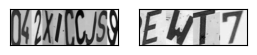

In [5]:
Sample_visualize(train_loader)

In [6]:
model = md.CNN(init_weights=False)
model.to(DEVICE)
print(model)

CNN(
  (localization): Sequential(
    (0): Conv2d(1, 48, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(48, 32, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=18720, out_features=100, bias=True)
    (10): ReLU()
    (11): Linear(in_features=100, out_features=6, bias=True)
    (12): ReLU()
  )
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [7]:
loss_fn = nn.CrossEntropyLoss().to(DEVICE)

if Optimizer_type == 'ADAM' :
  optimizer = torch.optim.Adam(model.parameters(), lr = Learning_rate, weight_decay = Weight_decay)
elif Optimizer_type == 'SGD' :
  optimizer = torch.optim.SGD(model.parameters(), lr = Learning_rate, weight_decay = Weight_decay)

In [8]:
## Training function ##
def train(dataloader, model, loss_fn, optimizer):
  for batch_idx, (X,y) in enumerate(dataloader):

    X = X.to(DEVICE)
    pred0, pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8, pred9, pred10 = model(X)
    # loss = 0.
    # for idx in range(11):
    #   y[idx] = y[idx].to(DEVICE)
    #   loss += loss_fn(torch.tensor(pred[idx], dtype=torch.float32), y[idx])
    for idx in range(11):
      y[idx] = y[idx].to(DEVICE)

    loss0 = loss_fn(pred0, y[0])
    loss1 = loss_fn(pred1, y[1])
    loss2 = loss_fn(pred2, y[2])
    loss3 = loss_fn(pred3, y[3])
    loss4 = loss_fn(pred4, y[4])
    loss5 = loss_fn(pred5, y[5])
    loss6 = loss_fn(pred6, y[6])
    loss7 = loss_fn(pred7, y[7])
    loss8 = loss_fn(pred8, y[8])
    loss9 = loss_fn(pred9, y[9])
    loss10 = loss_fn(pred10, y[10])
    loss = loss0 + loss1 + loss2 + loss3 + loss4 + loss5 + loss6 + loss7 + loss8 + loss9 + loss10

    optimizer.zero_grad()
    loss.requires_grad_(True)
    loss.backward()
    optimizer.step()

    if batch_idx % 5 == 0:
      print('loss: {:.6f} [{}/{}]'.format(loss.item(), batch_idx*len(X), len(dataloader.dataset)))

In [11]:
## Validation function ##
def validation(model, valdata):
  ## Input : trained model, validation data
  ## Output : validation loss

  model.eval()
  val_loss = 0
  char_correct = 0
  plate_correct = 0
  with torch.no_grad():
    for X, y in valdata:
      X = X.to(DEVICE)
      for idx in range(11):
        y[idx] = y[idx].to(DEVICE)
      val_pred0, val_pred1, val_pred2, val_pred3, val_pred4, val_pred5, val_pred6, val_pred7, val_pred8, val_pred9, val_pred10 = model(X)

      val_loss0 = loss_fn(val_pred0, y[0])
      val_loss1 = loss_fn(val_pred1, y[1])
      val_loss2 = loss_fn(val_pred2, y[2])
      val_loss3 = loss_fn(val_pred3, y[3])
      val_loss4 = loss_fn(val_pred4, y[4])
      val_loss5 = loss_fn(val_pred5, y[5])
      val_loss6 = loss_fn(val_pred6, y[6])
      val_loss7 = loss_fn(val_pred7, y[7])
      val_loss8 = loss_fn(val_pred8, y[8])
      val_loss9 = loss_fn(val_pred9, y[9])
      val_loss10 = loss_fn(val_pred10, y[10])

      val_loss += val_loss0 + val_loss1 + val_loss2 + val_loss3 + val_loss4 + val_loss5 + val_loss6 + val_loss7 + val_loss8 + val_loss9 + val_loss10

      val_pred0 = val_pred0.argmax(dim=-1, keepdim=True)
      val_pred1 = val_pred1.argmax(dim=-1, keepdim=True)
      val_pred2 = val_pred2.argmax(dim=-1, keepdim=True)
      val_pred3 = val_pred3.argmax(dim=-1, keepdim=True)
      val_pred4 = val_pred4.argmax(dim=-1, keepdim=True)
      val_pred5 = val_pred5.argmax(dim=-1, keepdim=True)
      val_pred6 = val_pred6.argmax(dim=-1, keepdim=True)
      val_pred7 = val_pred7.argmax(dim=-1, keepdim=True)
      val_pred8 = val_pred8.argmax(dim=-1, keepdim=True)
      val_pred9 = val_pred9.argmax(dim=-1, keepdim=True)
      val_pred10 = val_pred10.argmax(dim=-1, keepdim=True)

      char_correct += val_pred0.eq(y[0].view_as(val_pred0)).sum().item()
      char_correct += val_pred1.eq(y[1].view_as(val_pred1)).sum().item()
      char_correct += val_pred2.eq(y[2].view_as(val_pred2)).sum().item()
      char_correct += val_pred3.eq(y[3].view_as(val_pred3)).sum().item()
      char_correct += val_pred4.eq(y[4].view_as(val_pred4)).sum().item()
      char_correct += val_pred5.eq(y[5].view_as(val_pred5)).sum().item()
      char_correct += val_pred6.eq(y[6].view_as(val_pred6)).sum().item()
      char_correct += val_pred7.eq(y[7].view_as(val_pred7)).sum().item()
      char_correct += val_pred8.eq(y[8].view_as(val_pred8)).sum().item()
      char_correct += val_pred9.eq(y[9].view_as(val_pred9)).sum().item()
      char_correct += val_pred10.eq(y[10].view_as(val_pred10)).sum().item()

      tensors = [val_pred0.eq(y[0].view_as(val_pred0)),
                 val_pred1.eq(y[1].view_as(val_pred1)),
                 val_pred2.eq(y[2].view_as(val_pred2)),
                 val_pred3.eq(y[3].view_as(val_pred3)),
                 val_pred4.eq(y[4].view_as(val_pred4)),
                 val_pred5.eq(y[5].view_as(val_pred5)),
                 val_pred6.eq(y[6].view_as(val_pred6)),
                 val_pred7.eq(y[7].view_as(val_pred7)),
                 val_pred8.eq(y[8].view_as(val_pred8)),
                 val_pred9.eq(y[9].view_as(val_pred9)),
                 val_pred10.eq(y[10].view_as(val_pred10))]

      combined_tensor = torch.stack(tensors)
      result = torch.all(combined_tensor, dim=0)
      plate_correct = result.sum().item()

  val_loss /= len(valdata.dataset)
  print('\n***Validation Result***\nAverage loss: {:.6f}, Plate Accuracy: {}/{} ({:.1f}%), Character Accuracy: {}/{} ({:.1f}%)\n'.format(val_loss,
                                                                                                                                         plate_correct,
                                                                                                                                         len(valdata.dataset),
                                                                                                                                         100*plate_correct/len(valdata.dataset),
                                                                                                                                         char_correct,
                                                                                                                                         len(valdata.dataset)*11,
                                                                                                                                         100*char_correct/(len(valdata.dataset)*11)))

In [12]:
## Training Operation ##
start = time.time()
for t in range(epochs):
  print(f"\n[Epoch {t+1}]")
  train(train_loader, model, loss_fn, optimizer)
  validation(model, val_loader)
print("\nDone!")
end = time.time()

print("Training time: {:.4f}".format(end-start))


[Epoch 1]
loss: 36.939278 [0/4000]
loss: 36.064114 [160/4000]
loss: 36.938988 [320/4000]
loss: 36.845112 [480/4000]
loss: 36.563747 [640/4000]
loss: 36.438629 [800/4000]
loss: 36.813511 [960/4000]
loss: 36.469803 [1120/4000]
loss: 36.719704 [1280/4000]
loss: 36.625950 [1440/4000]
loss: 36.407139 [1600/4000]
loss: 36.813354 [1760/4000]
loss: 36.594643 [1920/4000]
loss: 37.282070 [2080/4000]
loss: 37.000832 [2240/4000]
loss: 37.000832 [2400/4000]
loss: 36.813297 [2560/4000]
loss: 36.688293 [2720/4000]
loss: 36.844532 [2880/4000]
loss: 36.813297 [3040/4000]
loss: 36.157066 [3200/4000]
loss: 36.438293 [3360/4000]
loss: 35.688305 [3520/4000]
loss: 36.813267 [3680/4000]
loss: 37.375744 [3840/4000]

***Validation Result***
Average loss: 1.191509, Plate Accuracy: 0/400 (0.0%), Character Accuracy: 1431/4400 (32.5%)


[Epoch 2]
loss: 36.813267 [0/4000]
loss: 36.532013 [160/4000]
loss: 36.969498 [320/4000]
loss: 36.219513 [480/4000]
loss: 36.219505 [640/4000]
loss: 37.094482 [800/4000]
loss: 37.